In [1]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

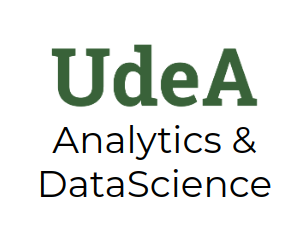

In [2]:
Image('../docs/udea-datascience.png')

# **Fundamentos de Probabilidad y Estadística - Práctico**
## Desarrollado por Javier Fernando Botía Valderrama
## Universidad de Antioquia

## Leer una base de datos

Para esta práctica, utilizaremos la base de datos del mundo real llamado **Stock Price** que se encuentra en la siguiente url: https://sci2s.ugr.es/keel/dataset.php?cod=1298

In [ ]:
import pandas as pd
import io
import requests 

In [ ]:
nombres = ['Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Company 6', 'Company 7', 'Company 8', 'Company 9', 'Company 10']
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/stock.dat"

download = requests.get(url).content
datos_stock = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',', names = nombres)
# Es importante codificarlo a utf-8
display(datos_stock.head(20))

In [ ]:
display(datos_stock.head())  # Si desean ver las 5 primeras filas de la base de datos

In [ ]:
datos_stock.info() # Observar el número de datos por cada columna de la base de datos y el tipo de dato

## Análisis inicial de la base de datos

Primero, vamos a explorar los datos con la función **.describe()**, los estadísticos de la media, desviación estándar, y los percentiles, así como los valores mínimos y máximos por cada columna de la base de datos

In [ ]:
datos_stock.describe()

Como pueden observar, por cada columna de la base de datos, calculamos la media, la desviación estándar, el valor mínimo y máximo, los percentiles y el conteo de datos. Vamos a seleccionar **Company 1** para hacer un histograma.

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = plt.figure(figsize=(15,8))
plt.hist(datos_stock['Company 1'], bins = 'fd', alpha=0.7) # fd = regla de Freedman-Diaconis
plt.xlim(datos_stock['Company 1'].min(), datos_stock['Company 1'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Histograma de Company 1')
plt.show()

Una estrategía para analizar el histograma es el cálculo de los cuartiles. Veamos el resultado que nos genera este cálculo:

In [ ]:
# Calculando los cuartiles
datos_stock['Company 1'].quantile([0, 0.25, 0.5, 0.75, 1])

Observen que los cuartiles nos está indicando como los valores se dividen en particiones del 0%, 25%, 50%, 75%, y 100%. Ahora vamos a calcular la mediana de los datos

In [ ]:
datos_stock['Company 1'].median()

Cuando se calcula el valor de la mediana, es equivalente al cuartil del 50%.

**Recordatorio de la Mediana:** es el número medio de una lista de números ordenada, ascendente o descendente, y puede ser más descriptiva de ese conjunto de datos que la media. Es decir, la mediana ordena el vector de valores y toma el valor central, lo cual, es menos sensible que la media muestral cuando hay valores extremos poco probables.

In [ ]:
datos_stock['Company 1'].mean()

In [ ]:
datos_stock['Company 1'].median() - datos_stock['Company 1'].mean() # Diferencia entre mediana y media

Como pueden observar en el histograma, se utiliza una regla para construir llamado regla de Freedman-Diaconis, útil para calcular los cuartiles y el ancho de las particiones. No obstante, ¿Qué sucedería si se consideran otras reglas?


In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(30,8))

ax = fig.add_subplot(1, 3, 1)
plt.hist(datos_stock['Company 1'], bins = 'fd', alpha=0.7) # fd = regla de Freedman-Diaconis
plt.xlim(datos_stock['Company 1'].min(), datos_stock['Company 1'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Histograma con la regla de Freedman-Diaconis para Company 1')

ax = fig.add_subplot(1, 3, 2)
plt.hist(datos_stock['Company 1'], bins = 'sturges', alpha=0.7, color = 'r') # Regla de Sturges
plt.xlim(datos_stock['Company 1'].min(), datos_stock['Company 1'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Histograma con la regla de Sturges para Company 1')

ax = fig.add_subplot(1, 3, 3)
plt.hist(datos_stock['Company 1'], bins = 'scott', alpha=0.7, color = 'm') # Regla de Scott
plt.xlim(datos_stock['Company 1'].min(), datos_stock['Company 1'].max()) # Límita el valor mínimo y máximo en eje x de la gráfica
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Histograma con la regla de Scott para Company 1')
plt.show()

Observen que al cambiar la regla para generar el histograma, hay algunos cambios en la distribución de los valores de Company 1. No obstante, al nivel práctico, el más utilizado es la regla de Freedman-Diaconis.

Un detalle importante cuando se calcula cuartiles de los datos es la **interpolación (por defecto es lineal)**, pero ¿Qué sucedería si se cambia el método de interpolación?

In [ ]:
datos_stock['Company 1'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'lower')

In [ ]:
datos_stock['Company 1'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'higher')

In [ ]:
datos_stock['Company 1'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'nearest')

In [ ]:
datos_stock['Company 1'].quantile([0, 0.25, 0.5, 0.75, 1], interpolation = 'midpoint')

## Análisis por grupos de datos

Para este caso, cada fila de la base de datos esta representando un conjunto de precios de diferentes productos de las compañias. Si deseamos obtener cuántos productos tienen un valor mayor a 50.000, realizaremos un conteo de acuerdo a una comparación.

In [ ]:
import numpy as np

num_mayores_50k = np.where(datos_stock.values >= 50.000)
numero_conteo_columnas = num_mayores_50k[1]
print(numero_conteo_columnas)

In [ ]:
Conteo = pd.DataFrame(numero_conteo_columnas).value_counts(sort = True)
display(Conteo) # La primera columna representa el número de la compañia

In [ ]:
nombres_companias_50K = ['Company 7','Company 5','Company 2', 'Company 10', 'Company 4', 'Company 1', 'Company 9'] # Se sumo un digito más porque el arreglo va de 0 hasta 9.

In [ ]:
import seaborn as sns

sns.barplot(y = nombres_companias_50K, x = Conteo.values)
plt.show()

Como se puede apreciar en este diagrama de barras, la compañia 7 tiene los precios por encima de 50.000, no obstante la compañia 5 tiene el segundo lugar con los productos por encima de 50.000

Ahora vamos a calcular el precio promedio de cada compañia por encima de 50.000

In [ ]:
Precio = []
Datos_Valores = datos_stock.values
num_mayores_50k_sin_tupla = np.asarray(num_mayores_50k)

for x in range(num_mayores_50k_sin_tupla.shape[1]):
  Precio.append(Datos_Valores[num_mayores_50k_sin_tupla[0,x],num_mayores_50k_sin_tupla[1,x]]) # Almacenamos la lista de precios por encima de 50K

In [ ]:
print(Precio)

In [ ]:
numero_conteo_columnas = pd.DataFrame(numero_conteo_columnas, index = None, columns = ['Compania'])
Precio = pd.DataFrame(Precio, index = None, columns = ['Precio'])
Datos_50k_concatenados = pd.concat([numero_conteo_columnas,Precio], axis = 1, join = 'inner')
display(Datos_50k_concatenados)

In [ ]:
Grupos_Datos = Datos_50k_concatenados.groupby(['Compania'])
datos_agrupados_precio_50K = Grupos_Datos['Precio']
Datos_promedio_50k = datos_agrupados_precio_50K.agg('mean') # Calculamos el valor promedio de los precios por encima de 50K
display(Datos_promedio_50k)

In [ ]:
nombres_companias_50K_rename = pd.DataFrame(['Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Company 6', 'Company 7', 'Company 8', 'Company 9', 'Company 10'])
pd.concat([nombres_companias_50K_rename,Datos_promedio_50k],axis = 1, ignore_index = True)

Como se puede apreciar en esta tabla de resultados, la compañia 7 tiene el promedio más alto de precios de sus productos por encima de 50.000 y además, es la compañia con la mayor cantidad de productos con precios por encima del umbral mencionado. Por otra parte, la compañia 9 tiene el promedio más bajo de productos por encima de 50.000 y además, es donde menos productos por encima de un precio de 50.000 se identificaron en la base de datos

Ahora, vamos a determinar la desviación estándar de los precios por encima de 50.000 de las compañias que se identificaron anteriormente

In [ ]:
Datos_std_50k = datos_agrupados_precio_50K.agg('std') # Calculamos la desviación estándar de los precios por encima de 50K
display(Datos_std_50k)

In [ ]:
pd.concat([nombres_companias_50K_rename,Datos_std_50k],axis = 1, ignore_index = True)

Concatenando la columna compania, el promedio y la desviación estándar

In [ ]:
pd.concat([nombres_companias_50K_rename,Datos_promedio_50k,Datos_std_50k],axis = 1, ignore_index = True)
# La columna 1 es el promedio
# La columna 2 es la desviación estándar

Se puede observar que la compañia 5 tiene la desviación estándar más alto para los productos por encima de 50.000. En este caso, los precios de la compañia 5 se mide como m = 66.947666 +/- std = 11.056985.

Por otra parte, la compañia 9 tiene la menor desviación estándar para los productos por encima de 50.000. Este resultado es evidente siendo que la compañia 9 tiene la menor cantidad de productos por encima de un precio de 50.000. 

## Aplicando la función de probabilidad Gaussiana con la base de datos

In [ ]:
pos = np.where(numero_conteo_columnas.values == 6) # número de datos de la compañia 7 (la etiqueta 6 es igual a la compañia 7)
Datos_50k_concatenados_compania7_50k = Datos_50k_concatenados.loc[pos[0],:] # Importante colocar pos[0] para que reconozca los posiciones que son iguales a 6 
display(Datos_50k_concatenados_compania7_50k)

In [ ]:
Datos_50k_concatenados_compania7_50k.Precio.describe()

In [ ]:
from scipy.stats import norm # distribución de probabilidad Gaussiana

media, desv_std = norm.fit(Datos_50k_concatenados_compania7_50k['Precio']) # A partir de los datos, calculamos la media y la desviación estándar, aplicando la Estimación de la Máxima Verosimilitud (MLE) de la Gaussiana
print("Valor de la media para Company 7 con precios mayores o iguales a 50.000 = ", media)
print("Valor de la desviación estándar para Company 7 con precios mayores o iguales a 50.000 = ", desv_std) 

In [ ]:
x_minimo = np.min(Datos_50k_concatenados_compania7_50k['Precio'].values)
x_maximo = np.max(Datos_50k_concatenados_compania7_50k['Precio'].values)
x = np.linspace(x_minimo, x_maximo, Datos_50k_concatenados_compania7_50k.shape[0]) # Generamos un arreglo de valores para construir la función de densidad de probabilidad Gaussiana
x.shape

In [ ]:
P_normal = norm.pdf(x, loc = media, scale = desv_std)

fig = plt.figure(figsize=(12,8))
plt.plot(x, P_normal, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 950, loc = media, scale = desv_std), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 7 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 7')
plt.show()

Si queremos conocer la probabilidad de observar los precios **inferiores a 70.000** para la compañia 7, se debe hacer el cálculo mediante la función de densidad de probabilidad acumulada.

In [ ]:
z_menos_70 = (70 - media)/desv_std # z = (x - media)/desviacion

prob_menos_70 = norm.cdf(z_menos_70, loc = 0, scale = 1) # Es importante colocar loc = 0 y scale = 1 para considerar un función de densidad de probabilidad normal con media 0 y varianza 1.
print("la probabilidad de observar los precios inferiores a 70.000 para la compañia 7 es = {:.6f}".format(prob_menos_70))

Si queremos conocer la probabilidad de observar precios de la compañia 7 **superiores a 80.000**

In [ ]:
z_mas_80 = (80 - media)/desv_std

prob_mas_80 = 1 - norm.cdf(z_mas_80, loc = 0, scale = 1) 
print("la probabilidad de observar los precios superiores a 80.000 para la compañia 7 es = {:.6f}".format(prob_mas_80))

¿Por qué se de restar 1 - cdf para encontrar la probabilidad de encontrar precios superiores a 80.000? Lo anterior se puede observar mediante una gráfica de la cdf.

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

PP = norm.cdf(x, loc = media, scale = desv_std)

plt.figure(figsize=(10,10))
plt.plot(x, PP, 'b-', lw = 5, alpha = 0.6, label='cdf Gaussiano')
plt.xlabel('$z$ (Precios de la Compañia 7)')
plt.ylabel('$cdf(z)$')
plt.title('cdf Gaussiana Compañia 7')
plt.show()

Observen como se acumula los valores de probabilidad desde el valor más pequeño del precio de la compañia 7 hasta el valor más alto del precio de la compañia 7, el cual, la cdf es 1.

Como solicitamos precios **superiores a 80.000**, se analiza los valores de probabilidad entre 80 y el valor máximo del precio

In [ ]:
PP_80 = norm.cdf(80, loc = media, scale = desv_std)
PP_max = norm.cdf(x_maximo, loc = media, scale = desv_std)
print(PP_max)

Este valor de probabilidad se puede redondear a 1. Por consiguiente:

In [ ]:
print("la probabilidad de observar los precios superiores a 80.000 para la compañia 7 es = {:.6f}".format(1 - PP_80))

Si queremos conocer **la probabilidad de observar precios entre 70.000 y 75.000**:

In [ ]:
z_70 = (70 - media)/desv_std
z_75 = (75 - media)/desv_std

prob_70 = norm.cdf(z_70, loc = 0, scale = 1)
prob_75 = norm.cdf(z_75, loc = 0, scale = 1)

print("La probabilidad de observaciones en el intervalo entre 70.000 y 75.000 es = {:.6f}".format(prob_75 - prob_70))

Considerando esta estrategía de análisis de los datos, vamos a analizar las otras compañias con precios superiores a 50.000

In [ ]:
pd.concat([nombres_companias_50K_rename,Datos_promedio_50k,Datos_std_50k],axis = 1, ignore_index = True)

In [ ]:
pos_0 = np.where(numero_conteo_columnas.values == 0)
pos_1 = np.where(numero_conteo_columnas.values == 1)
pos_3 = np.where(numero_conteo_columnas.values == 3)
pos_4 = np.where(numero_conteo_columnas.values == 4)
pos_8 = np.where(numero_conteo_columnas.values == 8)
pos_9 = np.where(numero_conteo_columnas.values == 9)
Datos_50k_concatenados_compania1_50k = Datos_50k_concatenados.loc[pos_0[0],:]
Datos_50k_concatenados_compania2_50k = Datos_50k_concatenados.loc[pos_1[0],:]
Datos_50k_concatenados_compania4_50k = Datos_50k_concatenados.loc[pos_3[0],:]
Datos_50k_concatenados_compania5_50k = Datos_50k_concatenados.loc[pos_4[0],:]
Datos_50k_concatenados_compania9_50k = Datos_50k_concatenados.loc[pos_8[0],:]
Datos_50k_concatenados_compania10_50k = Datos_50k_concatenados.loc[pos_9[0],:]

In [ ]:
media_comp_1, desv_comp_1 = norm.fit(Datos_50k_concatenados_compania1_50k['Precio'])
media_comp_2, desv_comp_2 = norm.fit(Datos_50k_concatenados_compania2_50k['Precio'])
media_comp_4, desv_comp_4 = norm.fit(Datos_50k_concatenados_compania4_50k['Precio'])
media_comp_5, desv_comp_5 = norm.fit(Datos_50k_concatenados_compania5_50k['Precio'])
media_comp_9, desv_comp_9 = norm.fit(Datos_50k_concatenados_compania9_50k['Precio'])
media_comp_10, desv_comp_10 = norm.fit(Datos_50k_concatenados_compania10_50k['Precio'])

In [ ]:
x_minimo_comp_1 = np.min(Datos_50k_concatenados_compania1_50k['Precio'].values)
x_maximo_comp_1 = np.max(Datos_50k_concatenados_compania1_50k['Precio'].values)

x_minimo_comp_2 = np.min(Datos_50k_concatenados_compania2_50k['Precio'].values)
x_maximo_comp_2 = np.max(Datos_50k_concatenados_compania2_50k['Precio'].values)

x_minimo_comp_4 = np.min(Datos_50k_concatenados_compania4_50k['Precio'].values)
x_maximo_comp_4 = np.max(Datos_50k_concatenados_compania4_50k['Precio'].values)

x_minimo_comp_5 = np.min(Datos_50k_concatenados_compania5_50k['Precio'].values)
x_maximo_comp_5 = np.max(Datos_50k_concatenados_compania5_50k['Precio'].values)

x_minimo_comp_9 = np.min(Datos_50k_concatenados_compania9_50k['Precio'].values)
x_maximo_comp_9 = np.max(Datos_50k_concatenados_compania9_50k['Precio'].values)

x_minimo_comp_10 = np.min(Datos_50k_concatenados_compania10_50k['Precio'].values)
x_maximo_comp_10 = np.max(Datos_50k_concatenados_compania10_50k['Precio'].values)


x_1 = np.linspace(x_minimo_comp_1, x_maximo_comp_1, Datos_50k_concatenados_compania1_50k.shape[0])
x_2 = np.linspace(x_minimo_comp_2, x_maximo_comp_2, Datos_50k_concatenados_compania2_50k.shape[0])
x_4 = np.linspace(x_minimo_comp_4, x_maximo_comp_4, Datos_50k_concatenados_compania4_50k.shape[0])
x_5 = np.linspace(x_minimo_comp_5, x_maximo_comp_5, Datos_50k_concatenados_compania5_50k.shape[0])
x_9 = np.linspace(x_minimo_comp_9, x_maximo_comp_9, Datos_50k_concatenados_compania9_50k.shape[0])
x_10 = np.linspace(x_minimo_comp_10, x_maximo_comp_10, Datos_50k_concatenados_compania10_50k.shape[0])                  

In [ ]:
P_normal_1 = norm.pdf(x_1, loc = media_comp_1, scale = desv_comp_1)
P_normal_2 = norm.pdf(x_2, loc = media_comp_2, scale = desv_comp_2)
P_normal_4 = norm.pdf(x_4, loc = media_comp_4, scale = desv_comp_4)
P_normal_5 = norm.pdf(x_5, loc = media_comp_5, scale = desv_comp_5)
P_normal_9 = norm.pdf(x_9, loc = media_comp_9, scale = desv_comp_9)
P_normal_10 = norm.pdf(x_10, loc = media_comp_10, scale = desv_comp_10)

In [ ]:
Conteo

In [ ]:
fig = plt.figure(figsize=(12,45))

ax = fig.add_subplot(6, 1, 1)
plt.plot(x_1, P_normal_1, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 950, loc = media_comp_1, scale = desv_comp_1), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 1 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 1')

ax = fig.add_subplot(6, 1, 2)
plt.plot(x_2, P_normal_2, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 450, loc = media_comp_2, scale = desv_comp_2), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 2 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 2')

ax = fig.add_subplot(6, 1, 3)
plt.plot(x_4, P_normal_4, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 195, loc = media_comp_4, scale = desv_comp_4), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 4 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 4')

ax = fig.add_subplot(6, 1, 4)
plt.plot(x_5, P_normal_5, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 707, loc = media_comp_5, scale = desv_comp_5), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 5 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 5')

ax = fig.add_subplot(6, 1, 5)
plt.plot(x_9, P_normal_9, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 55, loc = media_comp_9, scale = desv_comp_9), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 9 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 9')

ax = fig.add_subplot(6, 1, 6)
plt.plot(x_10, P_normal_10, 'b-', lw = 5, alpha = 0.6, label='pdf norm')
plt.hist(norm.rvs(size = 332, loc = media_comp_10, scale = desv_comp_10), density=True, histtype='stepfilled', alpha=0.5) # rvs significa variable aleatoria
plt.xlabel('$x$ = Precios de la Compañia 10 superiores a 50.000')
plt.ylabel('$f(x)$')
plt.title('pdf norm Compañia 10')

plt.show()

Si queremos conocer las probabilidades de observar los precios **inferiores a 70.000** para las compañias 1, 2, 4, 5, 9 y 10, entonces calculamos las cdfs:


In [ ]:
datos_stock.describe()

In [ ]:
z_menos_70_comp_1 = (70 - media_comp_1)/desv_comp_1
z_menos_70_comp_2 = (70 - media_comp_2)/desv_comp_2
z_menos_70_comp_4 = (70 - media_comp_1)/desv_comp_4
z_menos_70_comp_5 = (70 - media_comp_5)/desv_comp_5
z_menos_70_comp_9 = (70 - media_comp_9)/desv_comp_9
z_menos_70_comp_10 = (70 - media_comp_10)/desv_comp_10

prob_menos_70_comp_1 = 1 - norm.cdf(z_menos_70_comp_1, loc = 0, scale = 1) # 1 - cdf porque el precio máximo de la compañia es menor a 70 y no está definido en el intervalo
prob_menos_70_comp_2 = 1 - norm.cdf(z_menos_70_comp_2, loc = 0, scale = 1) # 1 - cdf porque el precio máximo de la compañia es menor a 70 y no está definido en el intervalo
prob_menos_70_comp_4 = 1 - norm.cdf(z_menos_70_comp_4, loc = 0, scale = 1) # 1 - cdf porque el precio máximo de la compañia es menor a 70 y no está definido en el intervalo
prob_menos_70_comp_5 = norm.cdf(z_menos_70_comp_5, loc = 0, scale = 1)
prob_menos_70_comp_9 = 1 - norm.cdf(z_menos_70_comp_9, loc = 0, scale = 1) # 1 - cdf porque el precio máximo de la compañia es menor a 70 y no está definido en el intervalo
prob_menos_70_comp_10 =1 -  norm.cdf(z_menos_70_comp_10, loc = 0, scale = 1) # 1 - cdf porque el precio máximo de la compañia es menor a 70 y no está definido en el intervalo

prob_menos_70_comp_7 = prob_menos_70 # cambiamos el nombre a la prob de la compañia 7 para hacer una comparación con las otras probabilidades

In [ ]:
nombres_companias_50K_rename = pd.DataFrame(['Company 1', 'Company 2', 'Company 4', 'Company 5', 'Company 7', 'Company 9', 'Company 10'])

prob_MENOS_70 = pd.DataFrame([prob_menos_70_comp_1, prob_menos_70_comp_2, prob_menos_70_comp_4, prob_menos_70_comp_5, prob_menos_70_comp_7, prob_menos_70_comp_9, prob_menos_70_comp_10])
pd.concat([nombres_companias_50K_rename, prob_MENOS_70],axis = 1, ignore_index = True)